## Implementation of a convolutional layer in a convolutional neural network (CNN)

This code implements the convolutional layer of a  CNN. This CNN receives an input RGB image along with a 3D filter specified by the user. The next stage adds a randomly generated bias to the the CNN output. Then, the ReLU (rectified linear unit) activation function transforms this output to generate a feature map.  
 

float64
(339, 509, 3)


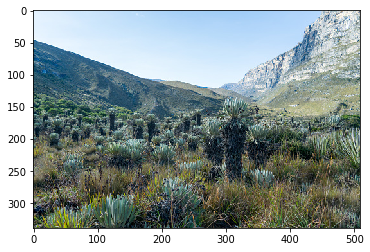

In [2]:
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import pandas as pd
import  scipy as sp
# load image as pixel array
data = image.imread('SierraNevadaCocuy.jpg')/255
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

The previous code loads an RGB image, normalizes it between 0 and 1, visualizes it, and verifies the data type and the image dimensions: float64, (rows, columns, number of color channels [R,G,B]).

In [3]:
def conv_3D(image,filter_3D,step,ws):
   out_h = image.shape[0]-ws[0]+1
   out_w = image.shape[1]-ws[1]+1
   F=np.zeros((out_h,out_w))
   filters_out=[]
    
   for y in range(0, image.shape[1] - ws[1], step): #columns
        for x in range(0, image.shape[0] - ws[0], step): #rows
            patch=image[x:x + ws[0],y:y + ws[1],0:image.shape[2]]
            F[x,y]=np.sum(patch*filter_3D)
    
   return F



The function conv_3D(image,filter_3D,step,ws) calculates the 3D convolution between a 3D filter and the input RGB image. There is no padding operation.

In [4]:
n_h=3 #filter height
n_w=3#filter width
ws=[n_h,n_w]
n_c=3#number of channels
step=1

filter_3D_v = np.ones((n_h,n_w,n_c))*np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
filter_3D_h = np.ones((n_h,n_w,n_c))*np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
filter_3D_d = np.ones((n_h,n_w,n_c))*np.array([[1,1,0],[1,0,-1],[0,-1,-1]])

F_v=conv_3D(data,filter_3D_v,step,ws)
F_h=conv_3D(data,filter_3D_h,step,ws)
F_d=conv_3D(data,filter_3D_d,step,ws)

bias=np.random.rand(1) #bias generated randomly.

Z_v=F_v+bias
Z_h=F_h+bias
Z_d=F_d+bias

A_v=Z_v * (Z_v > 0)
A_h=Z_v * (Z_h > 0)
A_d=Z_d * (Z_d > 0)

The code above applies three different 3D filters that underline the vertical, horizontal, and diagonal edges of all channels in a RGB image. These filters can be designed to select a specific color channel whose edges will be detected. Then, the following stage adds a randomly generated bias to the convolution whose result will be processed by a ReLU activation function.

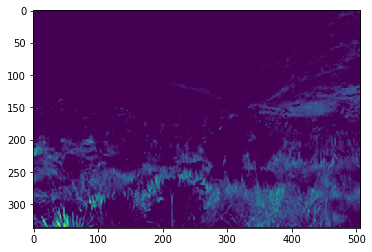

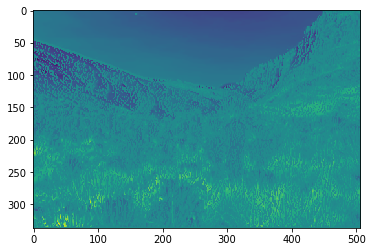

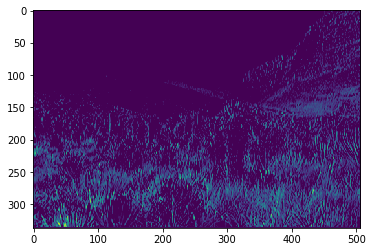

[0.37987335]
Input image size (339, 509, 3)
Convolution output size: (337, 507)
ReLU output size: (337, 507)


In [5]:
pyplot.imshow(A_v),pyplot.show()
pyplot.imshow(A_h),pyplot.show()
pyplot.imshow(A_d),pyplot.show()
bias=np.random.rand(1)
print(bias)
print('Input image size',data.shape)
print('Convolution output size:',F_v.shape)
print('ReLU output size:',A_v.shape)